# Color Exploration on Maps

## Downloading the Required Files from Google Drive

In [ ]:
import os
import gdown  # download shared Google Drive files and folders

if not os.path.exists('maps.tar.gz'):
    try:  # download 'maps.tar.gz' from Google Drive
        # URL to shared 'maps.tar.gz' archive
        url = 'https://drive.google.com/file/d/1r9X5sXfCuNHd58v36XdgrzvMUD_HM7La/view'
        gdown.download(url, quiet=True, fuzzy=True)
    except:  # download 'maps.tar.gz' from the Internet
        !wget 'http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/maps.tar.gz'

!ls -hal 'maps.tar.gz'  # check file exists

-rw-r--r-- 1 root root 239M Aug  7 13:29 maps.tar.gz


In [ ]:
# Extract data from archive
import zipfile
import tarfile

def extract(fname):
    """ Extract files from archive. """
    if fname.endswith(".tar.gz") or fname.endswith('.tgz'):
        ref = tarfile.open(fname, mode='r:gz')
    elif fname.endswith('.tar'):
        ref = tarfile.open(fname, mode='r:')
    elif fname.endswith('.tar.bz2') or fname.endswith('.tbz'):
        ref = tarfile.open(fname, mode='r:bz2')
    elif fname.endswith('.zip'):
        ref = zipfile.ZipFile(fname, mode='r')

    ref.extractall()
    ref.close()

extract('maps.tar.gz')

/tmp/ipython-input-2746548041.py:16: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  ref.extractall()


## Importing Libraries

In [ ]:
import os
import cv2
import math
import shutil
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image



SKIP = True  # skip some cells

from IPython.core.magic import register_cell_magic
from IPython import get_ipython

@register_cell_magic
def skip_if(line, cell):
    if eval(line):
        print("This cell will be skipped")
        return
    get_ipython().run_cell(cell)

## Showing Several Maps

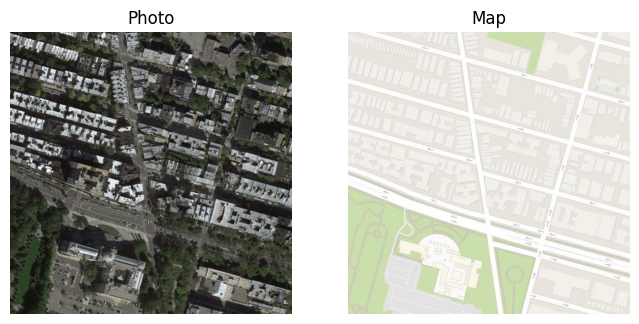

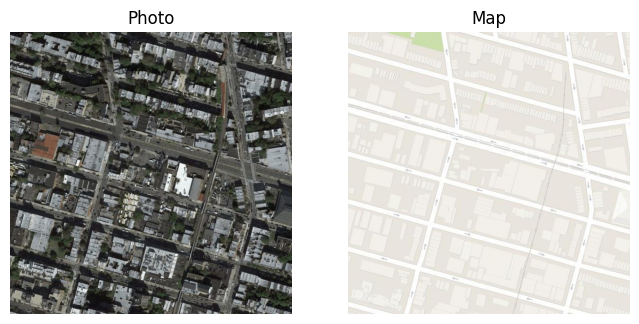

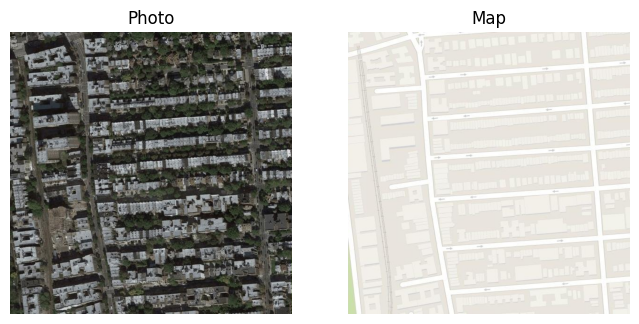

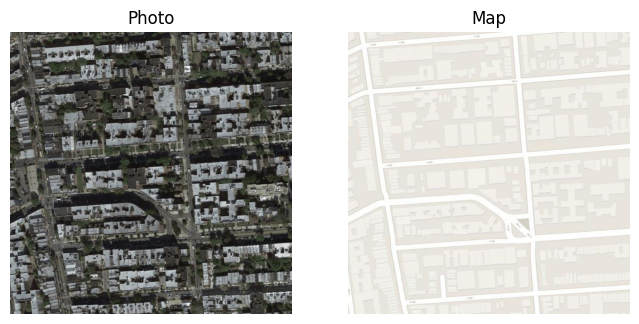

In [ ]:
def get_images(filepath):
    """ Get images from filepath. """
    image = Image.open(filepath)  # open file via Pillow (PIL) library
    image = np.array(image)  # convert from PIL to NumPy format
    image_photo = image[:, :600, :]  # photo image
    image_map = image[:, 600:, :]  # map image
    return image_photo, image_map


def get_images_from_dir(path, index):
    """ Get images from directory by index. """
    list_files = os.listdir(path)  # get list of all files in directory
    filepath = os.path.join(path, list_files[index])  # get file by index
    return get_images(filepath)


def add_image(image, title, cmap='viridis'):
    """ Add image to the image grid. Default color map is 'viridis'. """
    plt.imshow(image, cmap=cmap)  # add image to the image grid
    plt.title(title)  # show image title
    plt.axis('off')  # turn off axis numbers


def show_images(image_photo, image_map):
    fig = plt.figure(figsize=(8, 4))  # create figure with size 12×4 inches

    fig.add_subplot(1, 2, 1)  # add a new cell to the grid
    add_image(image_photo, 'Photo')

    fig.add_subplot(1, 2, 2)  # add a new cell to the grid
    add_image(image_map, 'Map')

    plt.show()  # show the grid


def show(image, size=(10, 10), title=None):
    """ Show image in Jupyter Notebook. """
    plt.figure(figsize=size)  # set image size in inches
    add_image(image, title)
    plt.show


for i in range(4):
    image_photo, image_map = get_images_from_dir('./maps/val', i)
    show_images(image_photo, image_map)

## Exploring Colors on Maps

### Exploring Colors on One Map

Map size: (600, 600, 3)
Reshape (600, 600, 3) to (360000, 3)
Number of unique colors: 9575
(9575, 3)

Yes, there is white color.


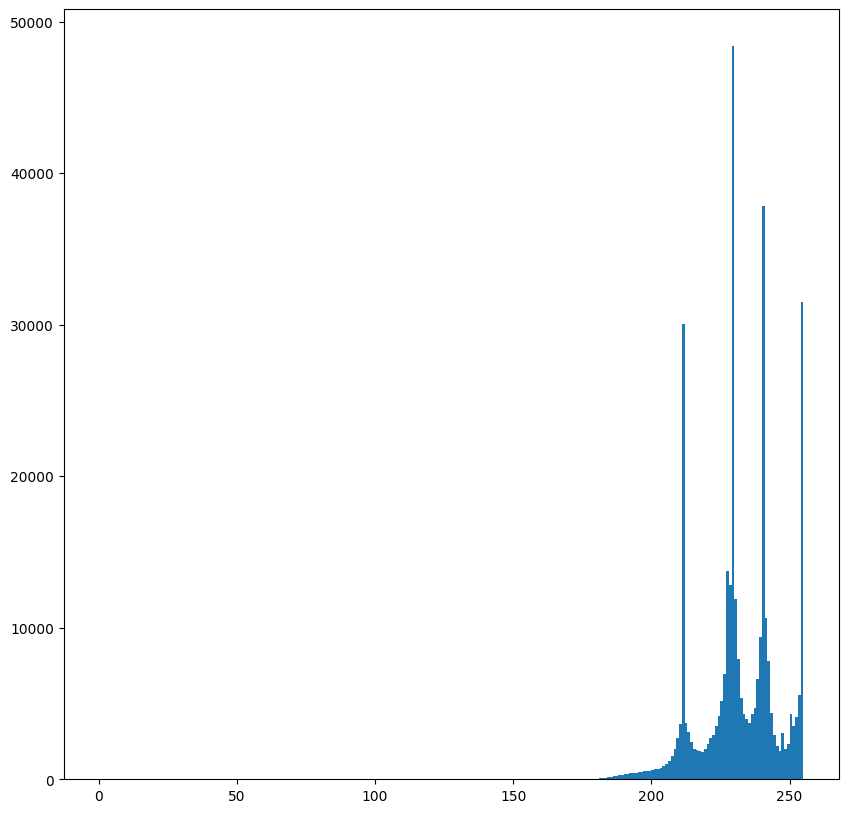

In [ ]:
def show_hist(image, size=(10, 10), title=None):
    """ Display grayscale histogram from image path
        using Matplotlib method `pyplot.hist`. """
    image = Image.fromarray(image)  # convert from NumPy to PIL format
    image = image.convert('L')  # convert to grayscale
    image = np.array(image)  # convert from PIL to NumPy format
    plt.figure(figsize=size)  # set size in inches
    plt.title(title)
    plt.hist(image.ravel(), bins=range(256), range=(0, 1))
    plt.show


def show_hist2(histogram, title=None):
    """ Plot the global histogram. """
    plt.figure(figsize=(10, 10))
    plt.bar(range(256), histogram, width=1.0, color='gray')
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()


index = 0
_, image_map = get_images_from_dir('./maps/val', index)
print(f'Map size: {image_map.shape}')

# Reshape (height, width, channels) into a 2D array where each row represents a
# pixel and its color channels. Reshape from (600, 600, 3) to (360 000, 3) array.
pixels = image_map.reshape(-1, image_map.shape[-1])
print(f'Reshape {image_map.shape} to {pixels.shape}')

unique_colors = np.unique(pixels, axis=0)  # find unique rows (unique colors)
num_unique_colors = len(unique_colors)
print(f'Number of unique colors: {num_unique_colors}')

print(unique_colors.shape)

white_color = (255, 255, 255)
print()
if white_color in unique_colors:
    print('Yes, there is white color.')
else:
    print('No, there is no white color.')

show_hist(image_map)

### Exploring Colors on All Maps

In [ ]:
%%skip_if {SKIP}  # this cell will be skipped


global_histogram = np.zeros(256)
train_dir = './maps/train'
list_files = os.listdir(train_dir)  # get list of all files in directory
print(f'There are {len(list_files)} maps in {train_dir}\n')

for i in range(len(list_files)):
# for i in range(2):
    if list_files[i].lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
        filepath = os.path.join(train_dir, list_files[i])  # get file by index
        try:
            _, image_map = get_images(filepath)

            # Calculate histogram for the current image
            hist_counts, _ = np.histogram(image_map.flatten(), bins=256, range=(0, 255))

            # Add to the global histogram
            global_histogram += hist_counts
        except Exception as e:
            print(f"Error processing {filepath}: {e}")

show_hist2(global_histogram, f'Combined Histogram of {len(list_files)} Images')

This cell will be skipped


## Color Thresholding

The core idea is to isolate specific color ranges within an image by setting lower and upper bounds for the color components.

In [ ]:
%%skip_if {SKIP}  # this cell will be skipped


def get_contours(image,
                 mode=cv2.RETR_EXTERNAL,  # find outermost contours by default
                 method=cv2.CHAIN_APPROX_SIMPLE):
    """ Find contours both for OpenCV v3.x and v4.x. """
    # Find the outermost contours, based on the binary dice image
    output = cv2.findContours(image=image, mode=mode, method=method)
    if len(output) == 3:  # (_, contours, hierarchy)
        return (output[1], output[2])
    elif len(output) == 2:  # (contours, hierarchy)
        return output


def show_contours(image, mask, size, title, inv=False, mode=cv2.RETR_EXTERNAL):
    """ Draw contours on the image and show it. """
    # Create binary image
    _, binary = cv2.threshold(mask, 1, 255, cv2.THRESH_BINARY)

    # Find outermost contours
    contours, _ = get_contours(
        image=binary,
        mode=mode,  # find outermost contours by default
        method=cv2.CHAIN_APPROX_SIMPLE)

    # for i, c in enumerate(contours, 1):
    #     print(f"\tSize of contour {i}: {len(c)}")

    # Draw contours on the image
    cv2.drawContours(image=image, contours=contours, contourIdx=-1,
                     color=(255, 0, 0), thickness=1)
    show(image, size, title)


def noise_reduction(mask, area):
    """ Reduce noise on the map image. """
    # Define a kernel (e.g., a 3x3 or 5x5 square kernel)
    kernel = np.ones((2, 2), np.uint8)
    # Perform Closing (dilation followed by erosion) to fill small holes
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    # Create binary image
    _, binary = cv2.threshold(mask, 1, 255, cv2.THRESH_BINARY)

    mode = cv2.RETR_TREE  # find all contours hierarchy
    contours, hierarchy = get_contours(  # find contours
        image=binary,
        mode=mode,
        method=cv2.CHAIN_APPROX_SIMPLE)

    contours_to_remove = []  # remove noise contours

    # Removing contours smaller than 100 pixels in area
    for c in contours:
        if cv2.contourArea(c) < area:
            contours_to_remove.append(c)

    removal_mask = np.zeros_like(mask)
    cv2.drawContours(removal_mask, contours_to_remove, -1, 255, cv2.FILLED)

    mask = cv2.bitwise_and(mask, cv2.bitwise_not(removal_mask))

    # Perform Closing (dilation followed by erosion) to fill small holes
    kernel = np.ones((7, 7), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    # Make lines thicker
    kernel = np.ones((3, 3), np.uint8)
    mask = cv2.dilate(mask, kernel, iterations=3) # Increase iterations for more thickness

    # # Perform Closing (dilation followed by erosion) to fill small holes
    # kernel = np.ones((3, 3), np.uint8)
    # mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    return mask


def show_masks(path, lower, upper, area=100):
    """ Get masks from the maps using color thresholding. """
    list_files = os.listdir(train_dir)  # get list of all files in directory

    for i in range(5):
        if list_files[i].lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            filepath = os.path.join(train_dir, list_files[i])  # get file by index
            try:
                image = cv2.imread(filepath)
                image_photo = image[:, :600, :]  # photo image
                image_map = image[:, 600:, :]  # map image

                # image_map = cv2.GaussianBlur(image_map, (3, 3), 0)  # blur image

                # Convert to HSV Color Space: While you can work with RGB,
                # converting to HSV (Hue, Saturation, Value) is often preferred for
                # color thresholding because it separates color information (Hue)
                # from brightness (Value) and intensity (Saturation),
                # making it easier to define color ranges.
                hsv_image = cv2.cvtColor(image_map, cv2.COLOR_BGR2HSV)

                # Define Color Range (Lower and Upper Bounds):
                # Determine the HSV values that define the color you want to isolate.
                # These values are typically found through experimentation
                # or by using color picker tools.
                mask = cv2.inRange(hsv_image, lower, upper)  # create mask
                # result = cv2.bitwise_and(image_map, image_map, mask=mask)

                # Noise reduction part
                mask = noise_reduction(mask, area)

                # Show images
                fig = plt.figure(figsize=(15, 5))  # create figure with size 12×4 inches
                fig.add_subplot(1, 3, 1)  # add a new cell to the grid
                add_image(image_photo, 'Photo')
                fig.add_subplot(1, 3, 2)  # add a new cell to the grid
                add_image(image_map, 'Map')
                fig.add_subplot(1, 3, 3)  # add a new cell to the grid
                add_image(mask, 'Emproved Mask')
                plt.show()  # show the grid

                show_contours(image_photo, mask, (12, 12), 'Contours', inv=False, mode=cv2.RETR_TREE)
                show(mask, size=(12, 12), title='Cleaned mask')

            except Exception as e:
                print(f"Error processing {filepath}: {e}")

This cell will be skipped


In [ ]:
%%skip_if {SKIP}  # this cell will be skipped


# white color (medium sized roads)
hsv_lower = np.array([ 0,  0, 245])  # best value: [ 0,  0, 245]
hsv_upper = np.array([165, 5, 255])  # best value: [165, 5, 255]
threshold_area = 100  # best value: 100

show_masks('./maps/train', hsv_lower, hsv_upper, threshold_area)

This cell will be skipped


In [ ]:
%%skip_if {SKIP}  # this cell will be skipped


# green color on the map
hsv_lower = np.array([34, 52, 219])  # best value: [34, 52, 219]
hsv_upper = np.array([43, 68, 226])  # best value: [43, 68, 226]
threshold_area = 10  # best value: 5-10

show_masks('./maps/train', hsv_lower, hsv_upper, threshold_area)

This cell will be skipped


In [ ]:
%%skip_if {SKIP}  # this cell will be skipped


def get_photo_with_mask(filepath, lower, upper, area):
    """ Get mask from the image map. """
    try:
        image = cv2.imread(filepath)
        image_photo = image[:, :600, :]  # photo image
        image_map = image[:, 600:, :]  # map image

        # Convert RGB to HSV
        hsv_image = cv2.cvtColor(image_map, cv2.COLOR_BGR2HSV)

        # Define Color Range (Lower and Upper Bounds)
        mask = cv2.inRange(hsv_image, lower, upper)  # create mask
        # result = cv2.bitwise_and(image_map, image_map, mask=mask)

        # Noise reduction
        mask = noise_reduction(mask, area)

        # Use broadcasting with np.newaxis to convert 2D mask to 3D array
        mask = mask[:, :, np.newaxis].repeat(3, axis=2)  # 2D to 3D

        # Combine two images in to one horizontally
        photo_with_mask = np.hstack((image_photo, mask))

        return photo_with_mask

    except Exception as e:
        print(f"Error processing {filepath}: {e}")
        return None


# white color (medium sized roads)
hsv_lower = np.array([ 0,  0, 245])  # best value: [ 0,  0, 245]
hsv_upper = np.array([165, 5, 255])  # best value: [165, 5, 255]
threshold_area = 100  # best value: 100

source_dir = './maps/train'
destin_dir = './photos_with_roads/train'

if os.path.exists(destin_dir):
    shutil.rmtree(destin_dir)  # remove directory and all its files
os.makedirs(destin_dir, exist_ok=True)  # create directory

list_files = os.listdir(source_dir)  # get list of all files in directory

# for i in range(list_files):
for i in range(5):
    fname = list_files[i]  # file name
    if fname.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
        filepath = os.path.join(source_dir, fname)
        savepath = os.path.join(destin_dir, fname)
        photo_with_roads = get_photo_with_mask(filepath, hsv_lower, hsv_upper, threshold_area)
        if photo_with_roads is not None:
            cv2.imwrite(savepath, photo_with_roads)  # save image

This cell will be skipped


## Preliminary color quantization for maps

Original code example: [Color quantization in an image using K-means in OpenCV Python](https://www.tutorialspoint.com/color-quantization-in-an-image-using-k-means-in-opencv-python)

In [ ]:
# import required libraries
import cv2
import numpy as np

from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow


index = 0
image_photo, image_map = get_images_from_dir('./maps/val', index)
# img = cv2.imread('horizon.jpg')  # read input image

z = image_map
# z = cv2.GaussianBlur(z, (3, 3), 0)  # blur image
z = z.reshape((-1,3))  # flatten the image array, 3 for BGR channels
z = np.float32(z)  # convert to np.float32

# define criteria, number of clusters (K) and apply kmeans()
K = 7  # best 7
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret, label, center = cv2.kmeans(z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((image_map.shape))

# display the image
show(image_map, size=(15, 15))
show(res2, size=(15, 15))
cv2.imwrite(f"image_map_{index}.png", res2)  # save image



# # Iterate through a range of K values and calculate inertia
# inertias = []
# k_values = range(2, 16) # Test K from 2 to 15

# for k in k_values:
#     ret, label, center = cv2.kmeans(z, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
#     # The 'ret' value returned by cv.kmeans is the compactness (inertia)
#     inertias.append(ret)

# # Plot the results to find the elbow
# plt.figure(figsize=(10, 6))
# plt.plot(k_values, inertias, marker='o')
# plt.xlabel("Number of Clusters (K)")
# plt.ylabel("Inertia (Sum of Squared Distances)")
# plt.title("Elbow Method for Optimal K")
# plt.grid(True)
# plt.show()



def get_contours(image,
                 mode=cv2.RETR_EXTERNAL,  # find outermost contours by default
                 method=cv2.CHAIN_APPROX_SIMPLE):
    """ Find contours both for OpenCV v3.x and v4.x. """
    # Find the outermost contours, based on the binary dice image
    output = cv2.findContours(image=image, mode=mode, method=method)
    if len(output) == 3:  # (_, contours, hierarchy)
        return (output[1], output[2])
    elif len(output) == 2:  # (contours, hierarchy)
        return output


def show_contours(image, mask, size, title, inv=False, mode=cv2.RETR_EXTERNAL):
    """ Draw contours on the image and show it. """
    # Create binary image
    _, binary = cv2.threshold(mask, 1, 255, cv2.THRESH_BINARY)

    # Find outermost contours
    contours, _ = get_contours(
        image=binary,
        mode=mode,  # find outermost contours by default
        method=cv2.CHAIN_APPROX_SIMPLE)

    # for i, c in enumerate(contours, 1):
    #     print(f"\tSize of contour {i}: {len(c)}")

    # Draw contours on the image
    cv2.drawContours(image=image, contours=contours, contourIdx=-1,
                     color=(255, 0, 0), thickness=1)
    show(image, size, title)


def noise_reduction(mask, area):
    """ Reduce noise on the map image. """

    # # Define a kernel (e.g., a 3x3 or 5x5 square kernel)
    # kernel = np.ones((2, 2), np.uint8)
    # # Perform Closing (dilation followed by erosion) to fill small holes
    # mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    # Create binary image
    _, binary = cv2.threshold(mask, 1, 255, cv2.THRESH_BINARY)

    mode = cv2.RETR_TREE  # find all contours hierarchy
    contours, hierarchy = get_contours(  # find contours
        image=binary,
        mode=mode,
        method=cv2.CHAIN_APPROX_SIMPLE)

    contours_to_remove = []  # remove noise contours

    # Removing contours smaller than 100 pixels in area
    for c in contours:
        if cv2.contourArea(c) < area:
            contours_to_remove.append(c)

    removal_mask = np.zeros_like(mask)
    cv2.drawContours(removal_mask, contours_to_remove, -1, 255, cv2.FILLED)

    mask = cv2.bitwise_and(mask, cv2.bitwise_not(removal_mask))

    # # Perform Closing (dilation followed by erosion) to fill small holes
    # kernel = np.ones((7, 7), np.uint8)
    # mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    # # Make lines thicker
    # kernel = np.ones((3, 3), np.uint8)
    # mask = cv2.dilate(mask, kernel, iterations=3) # Increase iterations for more thickness

    return mask


def show_masks(image_map, image_photo, lower, upper, area=100):
    """ Get masks from the maps using color thresholding. """

    # image_map = cv2.GaussianBlur(image_map, (3, 3), 0)  # blur image

    # Convert to HSV Color Space: While you can work with RGB,
    # converting to HSV (Hue, Saturation, Value) is often preferred for
    # color thresholding because it separates color information (Hue)
    # from brightness (Value) and intensity (Saturation),
    # making it easier to define color ranges.
    hsv_image = cv2.cvtColor(image_map, cv2.COLOR_BGR2HSV)

    # Define Color Range (Lower and Upper Bounds):
    # Determine the HSV values that define the color you want to isolate.
    # These values are typically found through experimentation
    # or by using color picker tools.
    mask = cv2.inRange(hsv_image, lower, upper)  # create mask
    # result = cv2.bitwise_and(image_map, image_map, mask=mask)

    # Noise reduction part
    mask = noise_reduction(mask, area)

    # Show images
    fig = plt.figure(figsize=(15, 5))  # create figure with size 12×4 inches
    fig.add_subplot(1, 3, 1)  # add a new cell to the grid
    add_image(image_photo, 'Photo')
    fig.add_subplot(1, 3, 2)  # add a new cell to the grid
    add_image(image_map, 'Map')
    fig.add_subplot(1, 3, 3)  # add a new cell to the grid
    add_image(mask, 'Emproved Mask')
    plt.show()  # show the grid

    show_contours(image_photo, mask, (12, 12), 'Contours', inv=False, mode=cv2.RETR_TREE)
    show(mask, size=(12, 12), title='Cleaned mask')


# white color (medium sized roads)
hsv_lower = np.array([90, 3, 253])  # best value: [ 0,  0, 253]
hsv_upper = np.array([90, 3, 253])  # best value: [90, 3, 255]
threshold_area = 15  # best value: 100

show_masks(res2, image_photo, hsv_lower, hsv_upper, threshold_area)

Output hidden; open in https://colab.research.google.com to view.

## Convert from RGB to HSV. Make color reduction for HSV

## Invert and find noise contours for inverted map

*Not important for now*.

## Create big map image from train and validation datasets

Create big map image from train and validation datasets.

Analyse bit map image for the optimal number of clasters.

## Try another dataset

For example, ...